In [151]:
import numpy as np
import pandas as pd

import xgboost

import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

from sklearn.feature_selection import SelectKBest
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

df = pd.read_csv('train.csv')

In [152]:
df_copy = df.copy()

In [153]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [154]:
df_numeric = df.select_dtypes(exclude=['object'])
df_cat = df.select_dtypes(include=['object'])


In [155]:
df_numeric

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [156]:
estimator = RandomForestRegressor(n_estimators=10, random_state=0)
imputer = IterativeImputer(estimator=estimator, max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(df_numeric)
imputed_df = pd.DataFrame(imputed_data, columns=df_numeric.columns)
imputed_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500.0
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,142125.0


<Axes: >

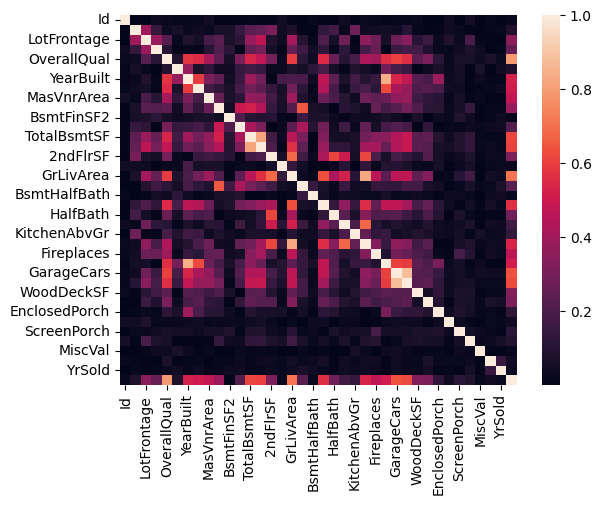

In [157]:
import seaborn as sns
correlation_matrix = abs(imputed_df.corr())

sns.heatmap(correlation_matrix)

In [158]:
le = preprocessing.LabelEncoder()

In [160]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Разделение признаков и целевой переменной
X = imputed_df.drop('SalePrice', axis=1)
y = imputed_df['SalePrice']

# Модель Lasso-регрессии
lasso = LassoCV(cv=5)

# Создание пайплайна с стандартизацией данных
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Стандартизация данных
    ('lasso', lasso)
])

# Обучение модели
pipeline.fit(X, y)

# Извлечение коэффициентов признаков
lasso_coefficients = pipeline.named_steps['lasso'].coef_

# Создание DataFrame с коэффициентами признаков
feature_importance = pd.Series(lasso_coefficients, index=X.columns).sort_values(ascending=False)

print("Feature Importance:\n", feature_importance)

# Выбор значимых признаков
selected_features = feature_importance[feature_importance != 0].index.tolist()
print("Selected Features:\n", selected_features)

# Создание нового DataFrame с выбранными признаками
X_selected = X[selected_features]
print("New DataFrame with Selected Features:\n", X_selected)

Feature Importance:
 OverallQual      24918.019189
GrLivArea        24057.947780
GarageCars        8079.791446
YearBuilt         8070.619753
TotRmsAbvGrd      6215.743364
MasVnrArea        5537.063956
BsmtFinSF1        4667.127122
BsmtFullBath      4131.703389
YearRemodAdd      4006.963677
TotalBsmtSF       3896.259781
OverallCond       3854.930771
LotArea           3794.755456
WoodDeckSF        2917.480161
Fireplaces        2382.766555
ScreenPorch       2357.520176
FullBath          1913.075721
1stFlrSF           865.152375
3SsnPorch           56.289360
EnclosedPorch        0.000000
GarageYrBlt          0.000000
OpenPorchSF          0.000000
GarageArea           0.000000
MiscVal             -0.000000
MoSold              -0.000000
Id                  -0.000000
BsmtHalfBath         0.000000
HalfBath            -0.000000
2ndFlrSF             0.000000
BsmtUnfSF           -0.000000
BsmtFinSF2          -0.000000
LotFrontage       -249.369975
LowQualFinSF      -289.641899
YrSold            -

<Axes: >

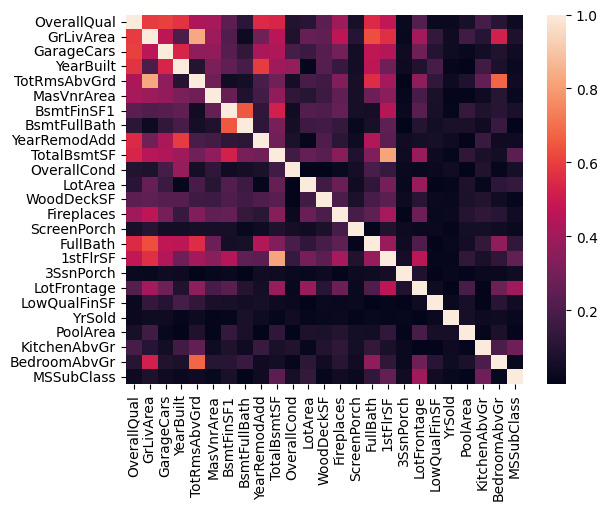

In [141]:

correlation_matrix = abs(X_selected.corr())

sns.heatmap(correlation_matrix)

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=942)

In [163]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

pipeline = Pipeline([
    ('MinMaxScaler', MinMaxScaler()),  # Шаг предобработки данных (масштабирование)
    ('LinearRegression', LinearRegression())  # Шаг построения модели
])

In [166]:
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Коэффициенты регрессии:", pipeline.named_steps['LinearRegression'].coef_)
print("Свободный член (перехват):", pipeline.named_steps['LinearRegression'].intercept_)
print("Среднеквадратическая ошибка:", mse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Коэффициент детерминации R^2:", r2)

Коэффициенты регрессии: [-1.61599874e+03 -3.31219256e+04 -3.03245620e+04  9.57320581e+04
  1.49937694e+05  3.24965855e+04  4.74136822e+04  1.00486618e+04
  6.13631993e+04  5.29695512e+04 -2.88691597e+01  2.74556253e+03
  4.99740503e+04  1.27076521e+05  6.08137981e+04  1.06998305e+04
  1.29144739e+05  2.73997197e+04 -1.98338505e+02  1.23052102e+04
 -5.85773230e+03 -6.19454364e+04 -2.31229650e+04  4.43904040e+04
  1.13805586e+04 -3.54663095e+03  5.43525340e+04 -1.53900782e+04
  2.23001611e+04  9.58746969e+03  3.14541577e+03 -3.45703591e+03
  2.63775843e+04 -2.73517667e+04 -1.59944042e+03 -1.64354269e+02
 -3.75414405e+03]
Свободный член (перехват): -52482.4336733653
Среднеквадратическая ошибка: 1333237884.596581
Средняя абсолютная ошибка (MAE): 22863.526226795653
Коэффициент детерминации R^2: 0.7825661395388919


In [145]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Обучение модели с Grid Search
grid_search.fit(X_train, y_train)

# Наилучшие параметры
print("Лучшие параметры:", grid_search.best_params_)

# Оценка модели
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)

# Оценка производительности
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print("Среднеквадратическая ошибка (MSE):", mse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Коэффициент детерминации R^2:", r2)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


ValueError: Invalid parameter 'regressor' for estimator Pipeline(steps=[('MinMaxScaler', MinMaxScaler()),
                ('LinearRegression', LinearRegression())]). Valid parameters are: ['memory', 'steps', 'verbose'].

Standart Scaler: 
Свободный член (перехват): 181429.7546757657
Среднеквадратическая ошибка: 1333375531.6022027
Средняя абсолютная ошибка (MAE): 22868.825015289076
Коэффициент детерминации R^2: 0.7825436910920249
MinMaxScaler:
Свободный член (перехват): -52482.4336733653
Среднеквадратическая ошибка: 1333237884.596581
Средняя абсолютная ошибка (MAE): 22863.526226795653
Коэффициент детерминации R^2: 0.7825661395388919

In [168]:
from sklearn.ensemble import RandomForestRegressor

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Шаг предобработки данных (масштабирование)
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  # Шаг построения модели
])

# Обучение модели
pipeline.fit(X_train, y_train)

# Сделать предсказания
y_pred = pipeline.predict(X_test)

# Оценка модели
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print("Среднеквадратическая ошибка (MSE):", mse)
print("Средняя абсолютная ошибка (MAE):", mae)
print("Коэффициент детерминации R^2:", r2)

# Если вы хотите посмотреть на важность признаков
importances = pipeline.named_steps['regressor'].feature_importances_
print("Важность признаков:", importances)

Среднеквадратическая ошибка (MSE): 1138131188.652735
Средняя абсолютная ошибка (MAE): 18708.277671232878
Коэффициент детерминации R^2: 0.8143855189542305
Важность признаков: [7.09571044e-03 2.80303155e-03 7.58053303e-03 1.59478523e-02
 5.66340865e-01 5.18797931e-03 1.44755112e-02 8.42368385e-03
 6.56884309e-03 2.10870269e-02 9.32580418e-04 6.77060420e-03
 4.69957893e-02 2.47667202e-02 3.61417911e-02 9.98267735e-05
 1.15321530e-01 1.33120846e-03 1.07898626e-04 1.70243645e-02
 1.26494632e-03 2.27701891e-03 1.21536846e-03 1.27983907e-02
 5.32439469e-03 5.58268449e-03 2.28760023e-02 1.88845986e-02
 9.09580703e-03 5.70291257e-03 1.41036150e-03 1.22319711e-04
 1.46689515e-03 6.58705283e-04 1.32887127e-04 4.65455658e-03
 1.52879976e-03]


StandartScaler:
Среднеквадратическая ошибка (MSE): 1138131188.652735
Средняя абсолютная ошибка (MAE): 18708.277671232878
Коэффициент детерминации R^2: 0.8143855189542305
MinMaxScaler:
Среднеквадратическая ошибка (MSE): 1141820093.8322344
Средняя абсолютная ошибка (MAE): 18735.508219178082
Коэффициент детерминации R^2: 0.8137839062163085

In [169]:
imputed_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456.0,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,...,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,175000.0
1456,1457.0,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,...,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,210000.0
1457,1458.0,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,...,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0,266500.0
1458,1459.0,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,...,366.0,0.0,112.0,0.0,0.0,0.0,0.0,4.0,2010.0,142125.0


In [170]:
imputed_df.dtypes

Id               float64
MSSubClass       float64
LotFrontage      float64
LotArea          float64
OverallQual      float64
OverallCond      float64
YearBuilt        float64
YearRemodAdd     float64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF         float64
2ndFlrSF         float64
LowQualFinSF     float64
GrLivArea        float64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath         float64
HalfBath         float64
BedroomAbvGr     float64
KitchenAbvGr     float64
TotRmsAbvGrd     float64
Fireplaces       float64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF       float64
OpenPorchSF      float64
EnclosedPorch    float64
3SsnPorch        float64
ScreenPorch      float64
PoolArea         float64
MiscVal          float64
MoSold           float64
YrSold           float64
SalePrice        float64
dtype: object

In [171]:
from sklearn.ensemble import IsolationForest
from sklearn.compose import ColumnTransformer

In [172]:
data = imputed_df
# Обнаружение выбросов и замена на NaN
def replace_outliers_with_nan(df):
    for column in df.columns:
        iso_forest = IsolationForest(contamination=0.05, random_state=42)
        df['anomaly'] = iso_forest.fit_predict(df[[column]])
        
        # Замена значений выбросов на NaN
        df.loc[df['anomaly'] == -1, column] = np.nan
        
        # Удаление временной колонки
        df.drop(columns=['anomaly'], inplace=True)
    
    return df

# Замена выбросов на NaN
data_with_nans = replace_outliers_with_nan(data.copy())

# Применение алгоритма MICE для заполнения пропусков
def apply_mice(df):
    # Определение предобработки
    numeric_features = df.columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline(steps=[
                ('scaler', StandardScaler()),
                ('imputer', IterativeImputer(random_state=42))
            ]), numeric_features)
        ]
    )
    
    # Применение предобработки
    df_imputed = pd.DataFrame(preprocessor.fit_transform(df), columns=df.columns)
    return df_imputed

# Применение MICE
mice_data = apply_mice(data_with_nans)

# Проверка результатов
print("Обработанные данные с MICE:")


Обработанные данные с MICE:
         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0  0.000100    0.181091    -0.280182 -0.280512     0.711210    -0.607532   
1 -0.002003   -0.904293     0.546101  0.074730    -0.087351     2.515967   
2  0.000489    0.181091    -0.114925  0.584425     0.711210    -0.607532   
3  0.003285    0.452437    -0.555610  0.059285     0.711210    -0.607532   
4  0.000872    0.181091     0.766444  1.514233     1.509772    -0.607532   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0   1.086370      0.850261    1.004788    0.753508  ...   -0.794106   
1   0.095632     -0.492660   -0.635371    1.447720  ...    2.111025   
2   1.012982      0.800523    0.720270    0.192013  ...   -0.794106   
3  -2.142703     -0.791086   -0.635371   -0.497095  ...   -0.794106   
4   0.976288      0.701047    2.293484    0.623343  ...    1.077656   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0     0.5288

c:\Users\NetDriver\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [173]:
mice_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.000100,0.181091,-0.280182,-0.280512,0.711210,-0.607532,1.086370,0.850261,1.004788,0.753508,...,-0.794106,0.528840,-0.314028,0.0,-0.177047,0.0,0.0,-1.797298,0.138777,0.589888
1,-0.002003,-0.904293,0.546101,0.074730,-0.087351,2.515967,0.095632,-0.492660,-0.635371,1.447720,...,2.111025,-0.800580,-0.314028,0.0,-0.177047,0.0,0.0,-0.610201,-0.614439,0.136715
2,0.000489,0.181091,-0.114925,0.584425,0.711210,-0.607532,1.012982,0.800523,0.720270,0.192013,...,-0.794106,0.114759,-0.314028,0.0,-0.177047,0.0,0.0,0.972596,0.138777,0.841650
3,0.003285,0.452437,-0.555610,0.059285,0.711210,-0.607532,-2.142703,-0.791086,-0.635371,-0.497095,...,-0.794106,-0.037798,1.295013,0.0,-0.177047,0.0,0.0,-1.797298,-1.367655,-0.559828
4,0.000872,0.181091,0.766444,1.514233,1.509772,-0.607532,0.976288,0.701047,2.293484,0.623343,...,1.077656,1.030097,-0.314028,0.0,-0.177047,0.0,0.0,2.159693,0.138777,1.286430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.001412,0.181091,-0.445439,-0.445158,-0.087351,-0.607532,0.939594,0.701047,-0.635371,-1.048381,...,-0.794106,0.071171,-0.314028,0.0,-0.177047,0.0,0.0,0.576897,-0.614439,0.027618
1456,-0.003425,-0.904293,0.821529,1.179070,-0.087351,0.433634,0.169020,0.104194,0.360439,0.967897,...,2.608211,-0.800580,-0.314028,0.0,-0.177047,0.0,0.0,-1.797298,1.645210,0.615064
1457,0.000355,0.452437,-0.225097,-0.097639,0.711210,1.602295,-1.188659,0.999474,-0.635371,-0.346512,...,-0.794106,0.507046,-0.314028,0.0,-0.177047,0.0,0.0,-0.610201,1.645210,1.563369
1458,-0.003827,-0.904293,-0.114925,0.110872,-0.885913,0.433634,-0.858413,0.502096,-0.635371,1.384303,...,2.773940,-0.800580,2.166135,0.0,-0.177047,0.0,0.0,-1.005900,1.645210,-0.524161


In [175]:
data = mice_data
# Обнаружение выбросов и замена на NaN
def replace_outliers_with_nan(df):
    for column in df.columns:
        iso_forest = IsolationForest(contamination=0.05, random_state=42)
        df['anomaly'] = iso_forest.fit_predict(df[[column]])
        
        # Замена значений выбросов на NaN
        df.loc[df['anomaly'] == -1, column] = np.nan
        
        # Удаление временной колонки
        df.drop(columns=['anomaly'], inplace=True)
    
    return df

# Замена выбросов на NaN
data_with_nans = replace_outliers_with_nan(data.copy())

# Применение алгоритма MICE для заполнения пропусков
def apply_mice(df):
    # Определение предобработки
    numeric_features = df.columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline(steps=[
                ('scaler', StandardScaler()),
                ('imputer', IterativeImputer(random_state=42))
            ]), numeric_features)
        ]
    )
    
    # Применение предобработки
    df_imputed = pd.DataFrame(preprocessor.fit_transform(df), columns=df.columns)
    return df_imputed

# Применение MICE
mice_data = apply_mice(data_with_nans)

# Проверка результатов
print("Обработанные данные с MICE:")


KeyError: "None of [Index(['anomaly'], dtype='object')] are in the [columns]"

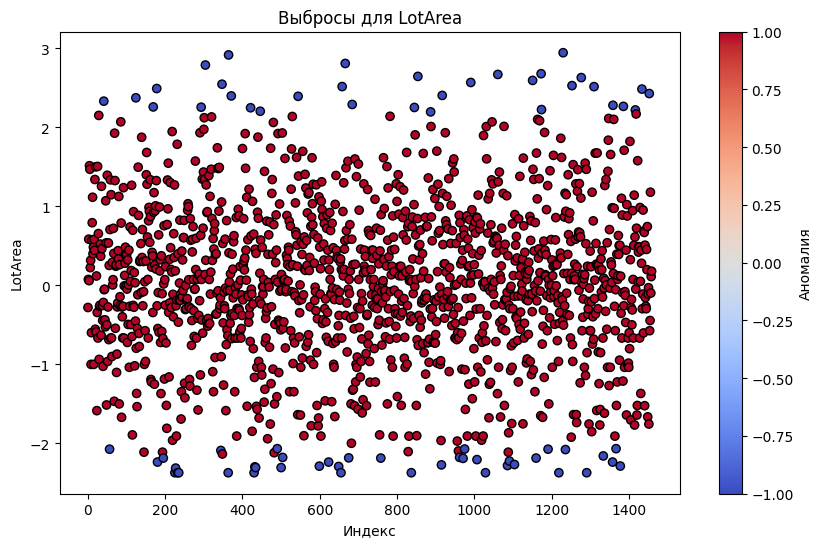

In [174]:
plot_feature_outliers(mice_data, 'LotArea')

In [116]:
from sklearn.compose import ColumnTransformer
# Удаление выбросов из данных
def remove_outliers(df):
    for column in df.columns:
        iso_forest = IsolationForest(contamination=0.05, random_state=42)
        df['anomaly'] = iso_forest.fit_predict(df[[column]])
        df.loc[df['anomaly'] == -1, column] = np.nan
        df.drop(columns=['anomaly'], inplace=True)
    return df

0      -1
1      -1
2      -1
3      -1
4      -1
       ..
1455   -1
1456   -1
1457   -1
1458   -1
1459   -1
Name: anomaly, Length: 1460, dtype: int32

In [117]:
# Удаление выбросов
data = imputed_df.copy()
clean_data = remove_outliers(data)

C:\Users\NetDriver\AppData\Local\Temp\ipykernel_10696\1880997745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['anomaly'], inplace=True)
C:\Users\NetDriver\AppData\Local\Temp\ipykernel_10696\1880997745.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anomaly'] = iso_forest.fit_predict(df[[column]])


KeyError: "None of [Index(['anomaly'], dtype='object')] are in the [columns]"

In [ ]:
# Применение алгоритма MICE для заполнения пропусков
def apply_mice(df):
    # Определение предобработки
    numeric_features = df.columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', Pipeline(steps=[
                ('scaler', StandardScaler()),
                ('imputer', IterativeImputer(random_state=42))
            ]), numeric_features)
        ]
    )
    
    # Применение предобработки
    df_imputed = pd.DataFrame(preprocessor.fit_transform(df), columns=df.columns)
    return df_imputed

In [ ]:

# Применение MICE
mice_data = apply_mice(clean_data)

# Проверка результатов
print("Обработанные данные с MICE:")
print(mice_data.head())

In [129]:
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Разделение признаков и целевой переменной
X = mice_data.drop('SalePrice', axis=1).fillna(0)
y = mice_data['SalePrice']

# Модель Lasso-регрессии
lasso = LassoCV(cv=5)

# Создание пайплайна с стандартизацией данных
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Стандартизация данных
    ('lasso', lasso)
])

# Обучение модели
pipeline.fit(X, y)

# Извлечение коэффициентов признаков
lasso_coefficients = pipeline.named_steps['lasso'].coef_

# Создание DataFrame с коэффициентами признаков
feature_importance = pd.Series(lasso_coefficients, index=X.columns).sort_values(ascending=False)

print("Feature Importance:\n", feature_importance)

# Выбор значимых признаков
selected_features = feature_importance[feature_importance != 0].index.tolist()
print("Selected Features:\n", selected_features)

# Создание нового DataFrame с выбранными признаками
X_selected = X[selected_features]
X_selected

Feature Importance:
 OverallQual      0.302224
GrLivArea        0.283053
TotalBsmtSF      0.212594
YearBuilt        0.157330
2ndFlrSF         0.138349
BsmtFinSF1       0.122787
GarageArea       0.088127
LotArea          0.084275
OverallCond      0.074465
YearRemodAdd     0.047528
Fireplaces       0.033170
BsmtFullBath     0.032585
OpenPorchSF      0.032062
LotFrontage      0.027923
WoodDeckSF       0.021322
Id               0.014448
TotRmsAbvGrd     0.012966
MoSold           0.011806
GarageCars       0.006754
GarageYrBlt      0.005266
EnclosedPorch    0.003529
3SsnPorch        0.000000
ScreenPorch     -0.000000
MiscVal          0.000000
YrSold          -0.000000
PoolArea         0.000000
FullBath         0.000000
KitchenAbvGr     0.000000
LowQualFinSF     0.000000
1stFlrSF        -0.000000
BsmtUnfSF       -0.000000
BsmtFinSF2       0.000000
MasVnrArea      -0.000000
anomaly         -0.000000
BsmtHalfBath    -0.002986
HalfBath        -0.005984
MSSubClass      -0.024582
BedroomAbvGr    -

In [78]:
'''
num
'LotFrontage'
label
'Alley','MasVnrType','MasVnrArea','BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual','PoolQC','Fence', 'MiscFeature'

'''

"\nnum\n'LotFrontage'\nlabel\n'Alley','MasVnrType','MasVnrArea','BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual','PoolQC','Fence', 'MiscFeature', ''\n\n"

In [9]:
le.fit(df.loc[:,'BsmtQual'])
preprocessing.LabelEncoder()

LabelEncoder()

In [10]:
dict(zip(le.classes_, le.transform(le.classes_)))

{'Ex': 0, 'Fa': 1, 'Gd': 2, 'TA': 3, nan: 4}

In [11]:
df[impute_cols_encoded] = le.transform(df[impute_cols])
df[['Id', 'BsmtQual','BsmtQual_no' ]]

,Id,BsmtQual,BsmtQual_no
0,1,Gd,2
1,2,Gd,2
2,3,Gd,2
3,4,TA,3
4,5,Gd,2
...,...,...,...
1455,1456,Gd,2
1456,1457,Gd,2
1457,1458,TA,3
1458,1459,TA,3


In [12]:
df[impute_cols_encoded] = df[impute_cols_encoded].map(lambda x: np.nan if x == 4 else x)

In [13]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,BsmtQual_no
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,3.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,2.0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,2.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,3.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2010,WD,Normal,142125,3.0


In [14]:
rf = RandomForestRegressor(random_state=100)

imputer = IterativeImputer(random_state=100,estimator=rf)


In [23]:
df[['Id','BsmtQual_no','BsmtQual']]

,Id,BsmtQual_no,BsmtQual
0,1,2.0,Gd
1,2,2.0,Gd
2,3,2.0,Gd
3,4,3.0,TA
4,5,2.0,Gd
...,...,...,...
1455,1456,2.0,Gd
1456,1457,2.0,Gd
1457,1458,3.0,TA
1458,1459,3.0,TA


In [25]:
imputer.fit(df[['Id','BsmtQual_no',]])

IterativeImputer(estimator=RandomForestRegressor(random_state=100),
                 random_state=100)

In [28]:
x = pd.DataFrame(imputer.transform(df[['Id','BsmtQual_no',]]))

In [ ]:
x

<Axes: >

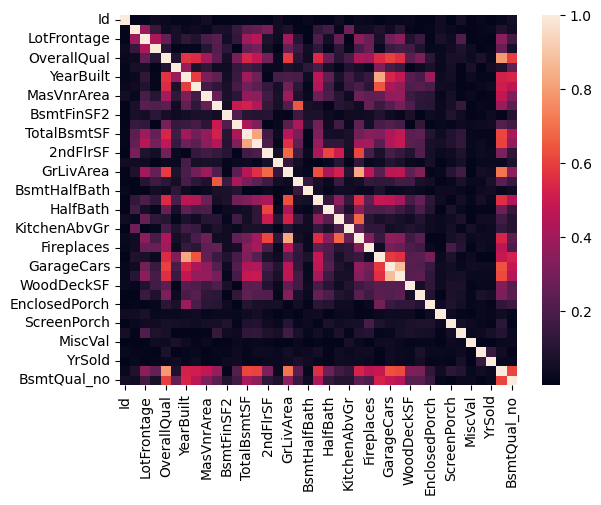

In [35]:
import seaborn as sns

# Дропаем все категориальные столбцы
df_numeric = df.select_dtypes(exclude=['object'])

correlation_matrix = abs(df_numeric.corr())

sns.heatmap(correlation_matrix)

In [40]:
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Разделение признаков и целевой переменной
X = df_numeric.drop('SalePrice', axis=1).fillna(0)
y = df_numeric['SalePrice']

# Модель Lasso-регрессии
lasso = LassoCV(cv=5)

# Создание пайплайна с стандартизацией данных
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Стандартизация данных
    ('lasso', lasso)
])

# Обучение модели
pipeline.fit(X, y)

# Извлечение коэффициентов признаков
lasso_coefficients = pipeline.named_steps['lasso'].coef_

# Создание DataFrame с коэффициентами признаков
feature_importance = pd.Series(lasso_coefficients, index=X.columns).sort_values(ascending=False)

print("Feature Importance:\n", feature_importance)

# Выбор значимых признаков
selected_features = feature_importance[feature_importance != 0].index.tolist()
print("Selected Features:\n", selected_features)

# Создание нового DataFrame с выбранными признаками
X_selected = X[selected_features]
print("New DataFrame with Selected Features:\n", X_selected)


Feature Importance:
 OverallQual      22569.350960
GrLivArea        21156.762479
GarageCars        9360.869591
TotalBsmtSF       7808.537447
YearBuilt         6765.502795
OverallCond       5742.462410
TotRmsAbvGrd      4882.175697
MasVnrArea        4534.064314
BsmtFullBath      4102.821672
BsmtFinSF1        3904.334858
LotArea           3600.270351
Fireplaces        3197.446426
YearRemodAdd      2701.245238
WoodDeckSF        2583.759861
ScreenPorch       2345.781896
2ndFlrSF          1772.440126
GarageArea         591.066887
FullBath           367.815717
3SsnPorch          113.309857
EnclosedPorch        0.000000
OpenPorchSF         -0.000000
MiscVal             -0.000000
MoSold               0.000000
Id                  -0.000000
HalfBath             0.000000
BsmtHalfBath         0.000000
1stFlrSF             0.000000
BsmtUnfSF           -0.000000
BsmtFinSF2           0.000000
LotFrontage         -0.000000
LowQualFinSF      -140.057029
YrSold            -230.594611
PoolArea          -